In [1]:
# Import stuff: 
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np

from sympy import Symbol
from sympy.solvers import solve

# This is for reasonable fontsize universally defined:
fs_label = 16
parameters = {                
                'figure.titlesize': fs_label+6,
                'axes.labelsize': fs_label,
                'axes.titlesize': fs_label+4,
                'xtick.labelsize': fs_label,
                'ytick.labelsize': fs_label, 
                'legend.fontsize': fs_label, 
                'lines.linewidth': 6
             }
plt.rcParams.update(parameters)

# We could also try with the colours:
#plt.rcParams['lines.color'] = 'r' # maybe here with more colours if needed?

In [2]:
# in this window, you put the correct parameters !!!
# phi = 25

In [3]:
#stages = 4
#shape = (stages, stages)
#L = np.zeros(shape)

L = np.array([
    [0,   0,       0,   25*0.8*1/4], 
    [0.8, 0.8*5/6, 0,   0], 
    [0,   0.8/6,   0,   0], 
    [0,   0,       0.8, 0.8*3/4]
])

In [4]:
eig_res = np.linalg.eig(L)
lams, vecs = eig_res
print(eig_res)



(array([-0.55151171+0.j        ,  0.31639741+0.74332683j,
        0.31639741-0.74332683j,  1.18538356+0.j        ]), array([[ 0.8251643 +0.j        , -0.70714939+0.j        ,
        -0.70714939-0.j        ,  0.53722406+0.j        ],
       [-0.54190048+0.j        ,  0.29346462+0.62277838j,
         0.29346462-0.62277838j,  0.828543  +0.j        ],
       [ 0.13100972+0.j        ,  0.11354448-0.00430959j,
         0.11354448+0.00430959j,  0.09319549+0.j        ],
       [-0.09101755+0.j        , -0.04474805-0.10512862j,
        -0.04474805+0.10512862j,  0.12736331+0.j        ]]))


In [5]:
V = vecs.T
Vi = np.linalg.inv(V)
#print("V:")
#print(V)
#print("Vi:")
#print(Vi)

evolve = lambda steps=1: V@np.diag([l**steps for l in lams])@Vi
def time_series(n0, t_end=10):
    ret = np.zeros((t_end, len(lams)))
    n = n0
    for t in range(t_end):
        n = np.matmul(L, n)
        ret[t] = n
    return ret
    # [matmul(evolve(i), n0) for i in range()]

In [6]:
t_end = 20
state_init = np.array([100, 0, 0, 0])
sim_res = time_series(state_init, t_end=t_end)
eggs, larv, pupa, bug = sim_res.T



Text(0.5, 0, 'Time [15 days]')

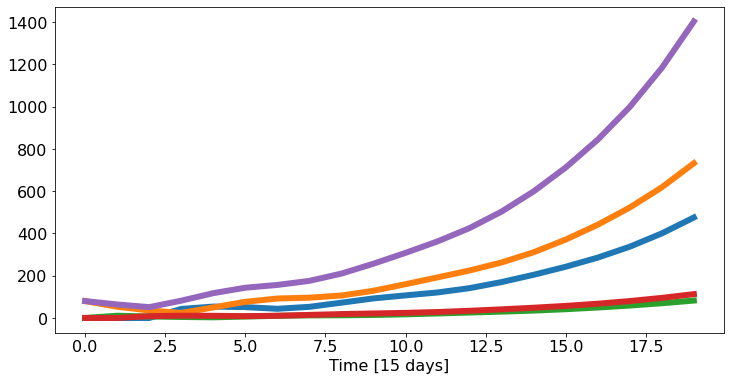

In [12]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(np.arange(t_end), eggs, label="eggs")
ax.plot(np.arange(t_end), larv, label="larvae")
ax.plot(np.arange(t_end), pupa, label="pupa")
ax.plot(np.arange(t_end), bug, label="label")
ax.plot(np.arange(t_end), np.sum(sim_res, axis=1), label="Population")

ax.set_xlabel("Time [15 days]")